In [49]:
import numpy as np
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
import keras 
from keras import layers
import matplotlib.pyplot as plt

In [2]:
helix = pd.read_csv("../data/helix.csv",index_col = 0)
swiss = pd.read_csv("../data/swiss_roll.csv",index_col = 0)
fold_washer = pd.read_csv("../data/folded_washer.csv",index_col = 0)
roll_washer = pd.read_csv("../data/rolled_washer.csv",index_col = 0)


In [3]:
## generate helix results for HLLEs
hlle = LocallyLinearEmbedding(n_neighbors=15, n_components=1, method='hessian') 
helix_hlle = hlle.fit_transform(helix)
pd.DataFrame(helix_hlle).to_csv("../data/helix_hlle.csv")

In [ ]:
def plot_train_history_loss(history):
        plt.plot(history.history['loss'], label='train_loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.title('Autoencoder Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')
        plt.show()

Epoch 1/100
7/7 [==============================] - 0s 10ms/step - loss: 7.9585 - val_loss: 30.7766
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 7.9102 - val_loss: 30.6592
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 7.8597 - val_loss: 30.5381
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 7.8072 - val_loss: 30.4133
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 7.7529 - val_loss: 30.2848
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 7.6976 - val_loss: 30.1513
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 7.6405 - val_loss: 30.0137
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 7.5810 - val_loss: 29.8722
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 7.5210 - val_loss: 29.7253
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 7.4578 - val_loss: 29.5733
Epoch 11/100
7/7 [

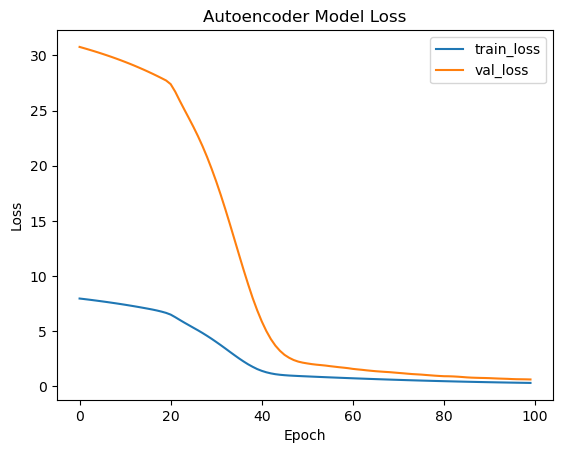

63/63 [==============================] - 0s 320us/step


In [119]:
### AE for helix
encoding_dim = 1
input = keras.Input(shape=(3,))
encoded = layers.Dense(3, activation='relu')(input)
encoded = layers.Dense(3, activation='relu')(encoded)

encoded = layers.Dense(1, activation='linear')(encoded)
encoder = keras.Model(input, encoded)

decoded = layers.Dense(3, activation='relu')(encoded)
decoded = layers.Dense(3, activation='linear')(decoded)


autoencoder = keras.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
# Train the autoencoder for helix roll and save data
swiss_ae = autoencoder.fit(helix, helix,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2) # Use 20% of data for validation
plot_train_history_loss(swiss_ae)
pd.DataFrame(encoder.predict(helix)).to_csv("../data/helix_AE.csv")

Epoch 1/10
7/7 [==============================] - 0s 10ms/step - loss: 57.1623 - val_loss: 59.3490
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 57.1149 - val_loss: 59.3029
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 57.0682 - val_loss: 59.2570
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 57.0207 - val_loss: 59.2118
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 56.9747 - val_loss: 59.1665
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 56.9282 - val_loss: 59.1215
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 56.8820 - val_loss: 59.0763
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 56.8356 - val_loss: 59.0309
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 56.7890 - val_loss: 58.9856
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 56.7422 - val_loss: 58.9405


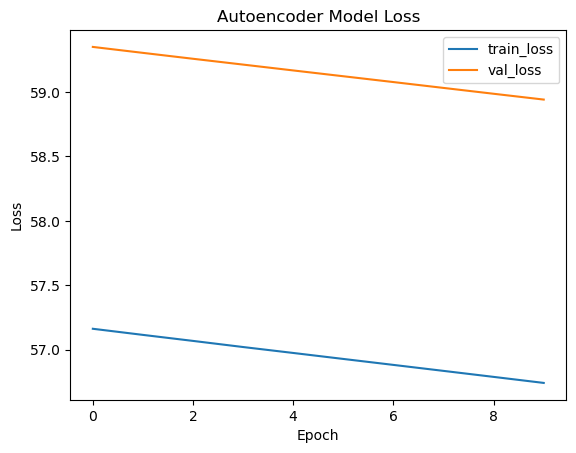

63/63 [==============================] - 0s 335us/step
Epoch 1/10
7/7 [==============================] - 0s 5ms/step - loss: 648.7460 - val_loss: 632.4207
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 648.3592 - val_loss: 631.9955
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 647.9307 - val_loss: 631.5699
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 647.5104 - val_loss: 631.1605
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 647.1064 - val_loss: 630.7727
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 646.7286 - val_loss: 630.4005
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 646.3619 - val_loss: 630.0461
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 646.0129 - val_loss: 629.7054
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 645.6751 - val_loss: 629.3752
Epoch 10/10
7/7 [============================

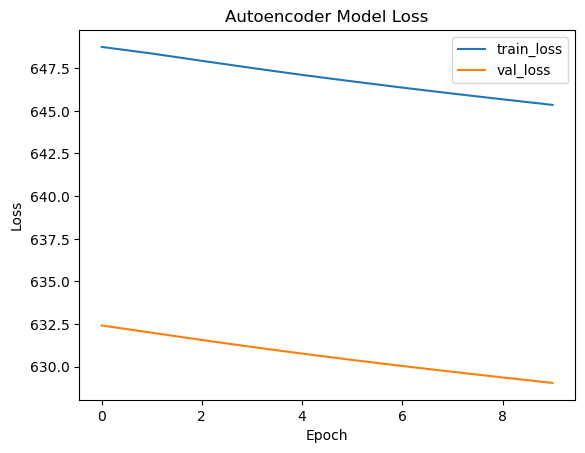

63/63 [==============================] - 0s 313us/step
Epoch 1/10
7/7 [==============================] - 0s 5ms/step - loss: 151.7707 - val_loss: 157.4062
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 151.7643 - val_loss: 157.3996
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 151.7608 - val_loss: 157.3959
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 151.7580 - val_loss: 157.3938
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 151.7566 - val_loss: 157.3922
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 151.7556 - val_loss: 157.3908
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 151.7545 - val_loss: 157.3897
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 151.7538 - val_loss: 157.3884
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 151.7527 - val_loss: 157.3873
Epoch 10/10
7/7 [============================

NameError: name 'roll_washer_ae' is not defined

In [107]:
### setup for AEs for 3d examples
encoding_dim = 2
input = keras.Input(shape=(3,))
encoded = layers.Dense(3, activation='relu')(input)
encoded = layers.Dense(3, activation='relu')(encoded)

encoded = layers.Dense(2, activation='linear')(encoded)
encoder = keras.Model(input, encoded)

decoded = layers.Dense(3, activation='relu')(encoded)
decoded = layers.Dense(3, activation='linear')(decoded)


autoencoder = keras.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder for swiss roll and save data
swiss_ae = autoencoder.fit(swiss, swiss,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2) # Use 20% of data for validation
plot_train_history_loss(swiss_ae)
pd.DataFrame(encoder.predict(swiss)).to_csv("../data/swiss_AE.csv")

# Train the autoencoder for folded washer roll and save data
fold_washer_ae = autoencoder.fit(fold_washer, fold_washer,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2) # Use 20% of data for validation
plot_train_history_loss(fold_washer_ae)
pd.DataFrame(encoder.predict(fold_washer)).to_csv("../data/fold_washer_AE.csv")

# Train the autoencoder for swiss roll and save data
roll_washer_ae = autoencoder.fit(roll_washer, roll_washer,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2) # Use 20% of data for validation
plot_train_history_loss(roll_washer_ae)
pd.DataFrame(encoder.predict(roll_washer)).to_csv("../data/roll_washer_AE.csv")